In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})



import scipy

In [ ]:
def compare_kde_and_beta(data):
    # Compute density estimates using 'silverman'
    x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
    
    ax[0].hist(data, bins=50, alpha=0.2, label='True distribution', density=True)
    ax[0].plot(x, y, label='KDE /w silverman')
    
    # Fitting a beta distribution
    alpha, beta, _, _ = scipy.stats.beta.fit(data, floc=0, fscale=1)
    ax[1].hist(data, bins=50, alpha=0.2, label)

    plt.legend()
    plt.show()    

In [2]:
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']
df = pd.read_csv('../../data/subset_data.csv', index_col=0)

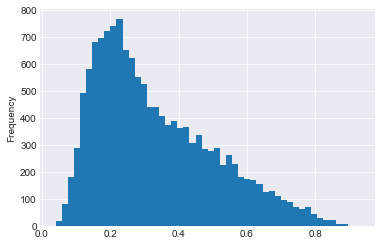

In [3]:
df['ES'].plot.hist(bins=50)
plt.show()

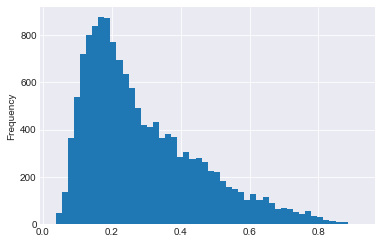

In [4]:
df['PSH'].plot.hist(bins=50)
plt.show()

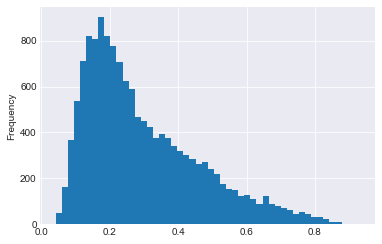

In [5]:
df['TH'].plot.hist(bins=50)
plt.show()

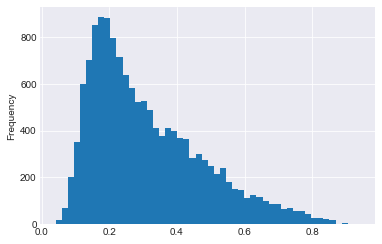

In [6]:
df['RRH'].plot.hist(bins=50)
plt.show()

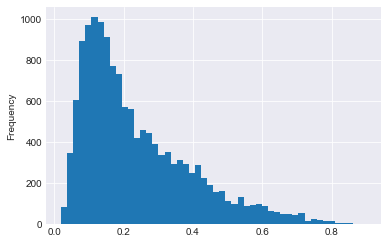

In [7]:
df['PREV'].plot.hist(bins=50)
plt.show()

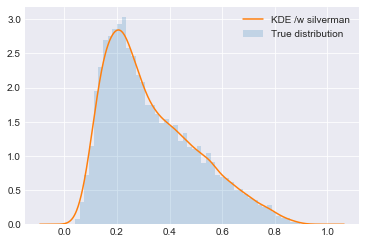

In [14]:
data = df['ES'].to_numpy()

# Compute density estimates using 'silverman'
plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)

x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman')

# Compute density estimates using 'ISJ' - Improved Sheather Jones
# y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate(x)
# plt.plot(x, y, label='KDE /w ISJ')

plt.legend()
plt.show()

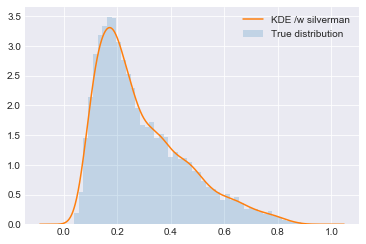

In [15]:
data = df['PSH'].to_numpy()

# Compute density estimates using 'silverman'
plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)

x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman')

# Compute density estimates using 'ISJ' - Improved Sheather Jones
# y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate(x)
# plt.plot(x, y, label='KDE /w ISJ')

plt.legend()
plt.show()

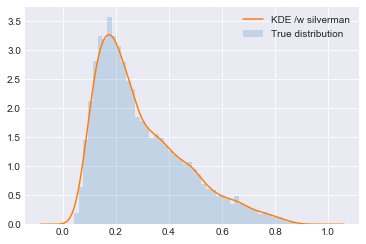

In [16]:
data = df['TH'].to_numpy()

# Compute density estimates using 'silverman'
plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)

x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman')

# Compute density estimates using 'ISJ' - Improved Sheather Jones
# y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate(x)
# plt.plot(x, y, label='KDE /w ISJ')

plt.legend()
plt.show()

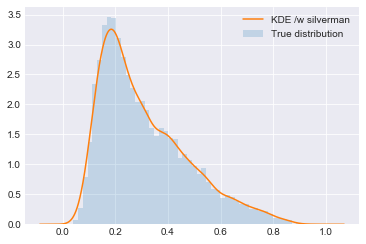

In [17]:
data = df['RRH'].to_numpy()

# Compute density estimates using 'silverman'
plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)

x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman')

# Compute density estimates using 'ISJ' - Improved Sheather Jones
# y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate(x)
# plt.plot(x, y, label='KDE /w ISJ')

plt.legend()
plt.show()

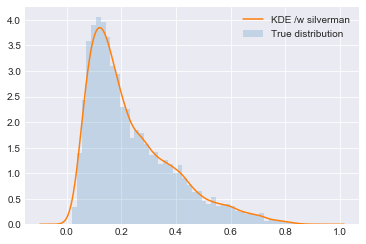

In [18]:
data = df['PREV'].to_numpy()

# Compute density estimates using 'silverman'
plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)

x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman')

# Compute density estimates using 'ISJ' - Improved Sheather Jones
# y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate(x)
# plt.plot(x, y, label='KDE /w ISJ')

plt.legend()
plt.show()

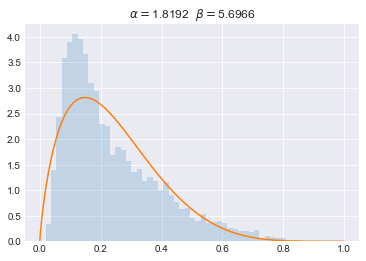

In [26]:
alpha, beta, loc, scale = scipy.stats.beta.fit(
    data, floc=0, fscale=1
)

xs = np.linspace(0, 1, 1000)

plt.hist(data, bins=50, alpha=0.2, density=True)
plt.plot(xs, scipy.stats.beta.pdf(xs, alpha, beta))
plt.title(r'$\alpha = $' + f'{alpha:.4f}' + r'  $\beta = $' + f'{beta:.4f}')

plt.show()

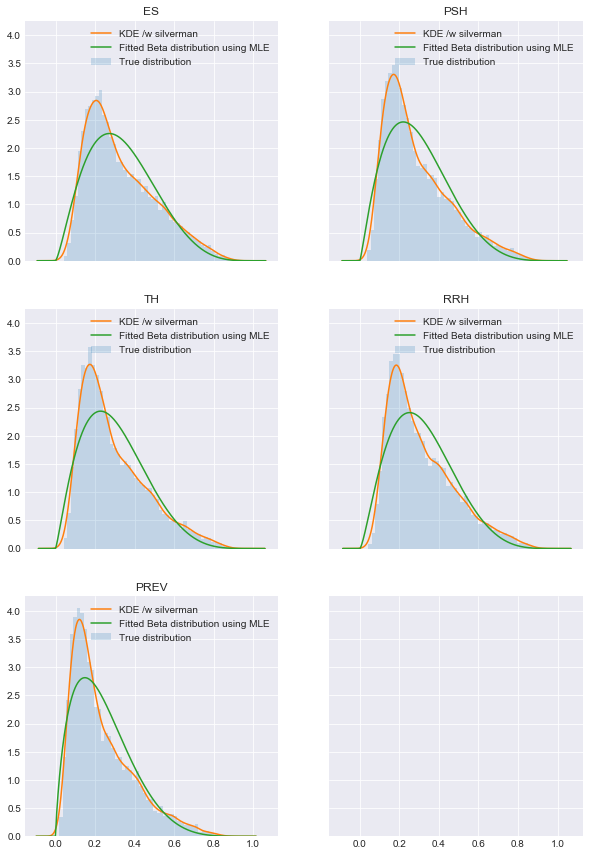

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15), sharex=True, sharey=True)

for i, type_ in enumerate(types):
    data = df[type_].to_numpy()
    
    # Compute density estimates using 'silverman'
    ax[i // 2][i % 2].hist(data, bins=50, alpha=0.2, label='True distribution', density=True)

    x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
    ax[i // 2][i % 2].plot(x, y, label='KDE /w silverman')
    
    # Fitting a beta distribution to the data using MLE
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html
    alpha, beta, _, _ = scipy.stats.beta.fit(
        data, floc=0, fscale=1
    )
    ax[i // 2][i % 2].plot(
        x, scipy.stats.beta.pdf(x, alpha, beta),
        label='Fitted Beta distribution using MLE'
    )
    
    ax[i // 2][i % 2].legend()
    ax[i // 2][i % 2].set_title(type_)
    
# ax[-1][-1].axis('off')
    
plt.show()

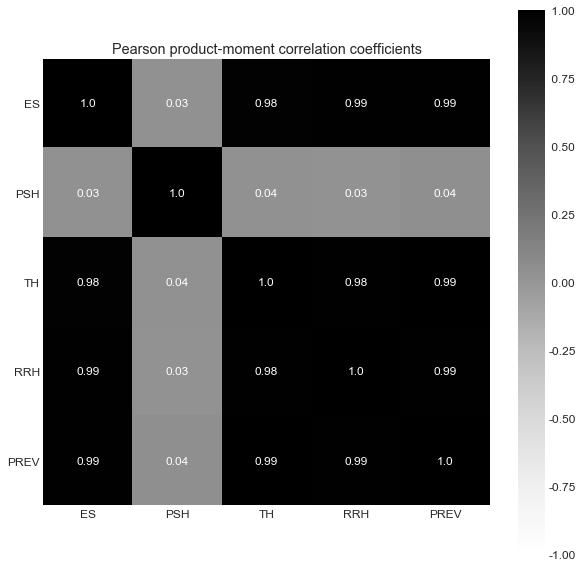

In [18]:
corr_matrix = np.corrcoef(df[types].to_numpy().T)
corr_matrix

ticks = [i for i in range(5)]

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr_matrix)

im.set_clim(-1, 1)
ax.grid(False)

ax.xaxis.set(ticks=ticks, ticklabels=types)
ax.yaxis.set(ticks=ticks, ticklabels=types)
# ax.set_ylim(2.5, -0.5)

for i in range(5):
    for j in range(5):
        ax.text(j, i, corr_matrix[i, j].round(2), ha='center', va='center',
                color='w')

cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.title('Pearson product-moment correlation coefficients')

plt.show()